<a href="https://colab.research.google.com/github/iqbalthms/Tugas-Machine-Learning/blob/main/Week_5_MLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by : Muhammad Iqbal Thomas 1103183187

# Dimensionality Reduction
PCA (Principal Component Analysis)
The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The i-th principal component can be taken as a direction orthogonal to the first i-1 principal components that maximizes the variance of the projected data.

[Reference](https://en.wikipedia.org/wiki/Principal_component_analysis)

# PCA for Data Visualization
For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

**Load Iris Dataset**

In this assignment we will be using the iris dataset. The dataset can be acquired from the url below

In [1]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Import required module(s)

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [3]:
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#Take a peek into the dataframe
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Standardize the Data**
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

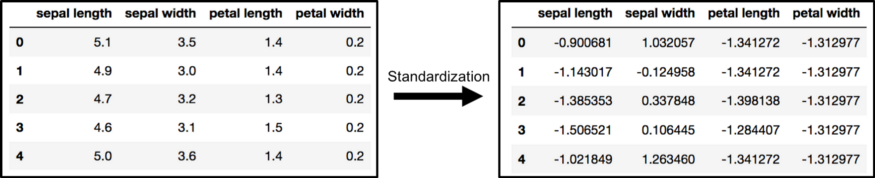

**PCA Projection to 2D**

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [7]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


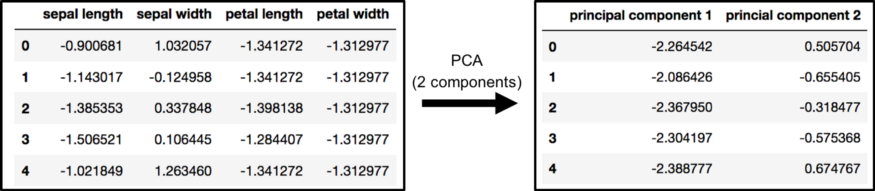

In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


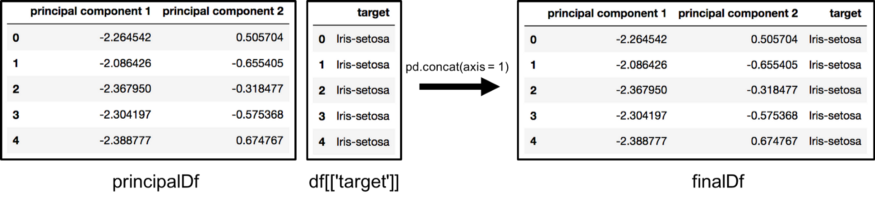

**Visualize 2D Projection**

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

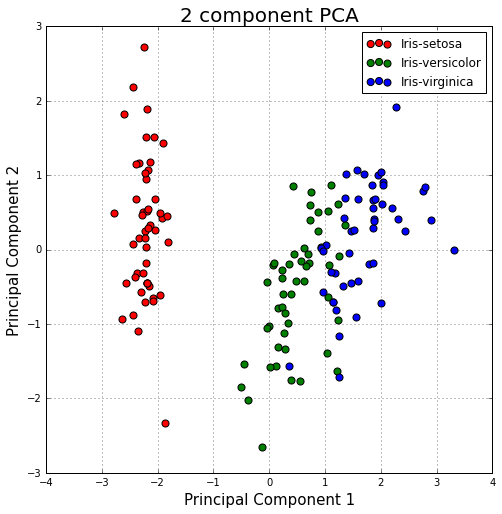

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Explained Variance**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# LDA (Linear Discriminant Analysis)
Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

[Reference](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)

Like PCA, the Scikit-Learn library contains built-in classes for performing LDA on the dataset. In this section we will apply LDA on the Iris dataset since we used the same dataset for the PCA technique

In [11]:
#import required module(s)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load Iris Dataset

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
dataset = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#Take a peek into the dataframe
dataset.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing
Once dataset is loaded into a pandas data frame object, the first step is to divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. The following code divides data into labels and feature set:

In [13]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

The above script assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable

The following code divides data into training and test sets:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling
As was the case with PCA, we need to perform feature scaling for LDA too. Execute the following script to do so:

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Performing LDA
It requires only four lines of code to perform LDA with Scikit-Learn. The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis module can be used to Perform LDA in Python. Take a look at the following script:

In [16]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In the script above the LinearDiscriminantAnalysis class is imported as LDA. Like PCA, we have to pass the value for the n_components parameter of the LDA, which refers to the number of linear discriminates that we want to retrieve. In this case we set the n_components to 1, since we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.

Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. However in the case of PCA, the transform method only requires one parameter i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.

# Training and Making Predictions

In [17]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluating the Performance
the last step is to evaluate performance of the algorithm with the help of a confusion matrix and find the accuracy of the prediction.

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy1.0


the algorithm achieved an accuracy of 100%

# Singular Value Decomposition (SVD)
The purpose of Singular Value Decomposition is to simplify a matrix and make doing calculations with the matrix easier. The matrix is reduced to its constituent parts, similar to the goal of PCA. Understanding the ins and outs of SVD isn't completely necessary to implement it in your machine learning models, but having an intuition for how it works will give you a better idea of when to use it.

SVD can be carried out on either complex or real-valued matrices, but to make this explanation easier to understand, we'll go over the method of decomposing a real-valued matrix.

When doing SVD we have a matrix filled in with data and we want to reduce the number of columns the matrix has. This reduces the dimensionality of the matrix while still preserving as much of the variability in the data as possible.

**SVD Implementation Example**

One of the most common ways that SVD is used is to compress images. After all, the pixel values that make up the red, green, and blue channels in the image can just be reduced and the result will be an image that is less complex but still contains the same image content. Let's try using SVD to compress an image and render it.

We'll use several functions to handle the compression of the image. We'll really only need Numpy and the Image function from the PIL library in order to accomplish this, since Numpy has a method to carry out the SVD calculation:

In [19]:
#Import Required Modules
import numpy
from PIL import Image

# Load an Image and Convert It into Numpy Array
First, we'll just write a function to load in the image and turn it into a Numpy array. We then want to select the red, green, and blue color channels from the image:

In [20]:
def load_image(image):
    image = Image.open(image)
    im_array = numpy.array(image)

    red = im_array[:, :, 0]
    green = im_array[:, :, 1]
    blue = im_array[:, :, 2]

    return red, green, blue

# **Compress the Color Channel**
Now that we have the colors, we need to compress the color channels. We can start by calling Numpy's SVD function on the color channel we want. We'll then create an array of zeroes that we'll fill in after the matrix multiplication is completed. We then specify the singular value limit we want to use when doing the calculations:

In [21]:
def channel_compress(color_channel, singular_value_limit):
    u, s, v = numpy.linalg.svd(color_channel)
    compressed = numpy.zeros((color_channel.shape[0], color_channel.shape[1]))
    n = singular_value_limit

    left_matrix = numpy.matmul(u[:, 0:n], numpy.diag(s)[0:n, 0:n])
    inner_compressed = numpy.matmul(left_matrix, v[0:n, :])
    compressed = inner_compressed.astype('uint8')
    return compressed

red, green, blue = load_image("DUCK.jpg")
singular_val_lim = 350

# Compress Image
After this, we do matrix multiplication on the diagonal and the value limits in the U matrix, as described above. This gets us the left matrix and we then multiply it with the V matrix. This should get us the compressed values which we transform to the ‘uint8' type:

In [23]:
def compress_image(red, green, blue, singular_val_lim):
    compressed_red = channel_compress(red, singular_val_lim)
    compressed_green = channel_compress(green, singular_val_lim)
    compressed_blue = channel_compress(blue, singular_val_lim)

    im_red = Image.fromarray(compressed_red)
    im_blue = Image.fromarray(compressed_blue)
    im_green = Image.fromarray(compressed_green)

    new_image = Image.merge("RGB", (im_red, im_green, im_blue))
    new_image.show()
    new_image.save("DUCK-compressed.jpg")

compress_image(red, green, blue, singular_val_lim)

We'll be using this image of a dog to test our SVD compression on: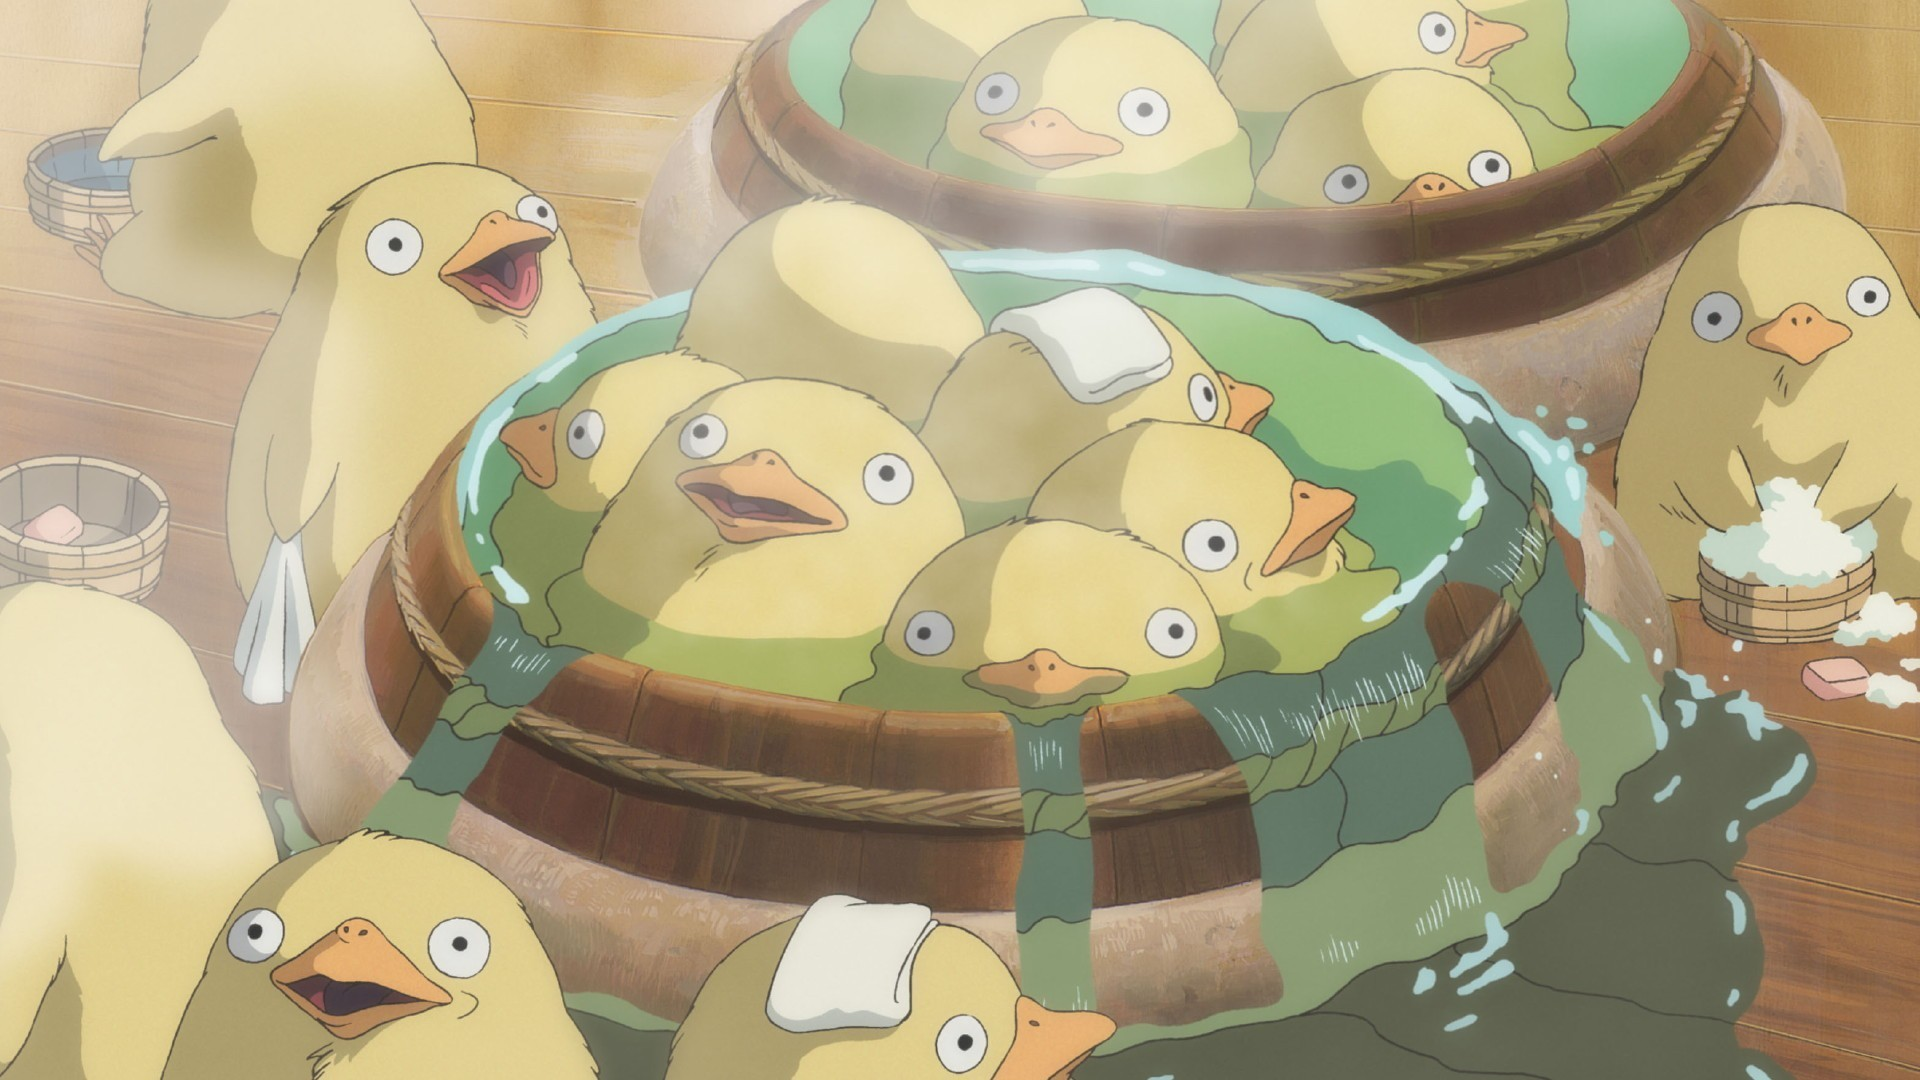

Finally, we can get the compressed values for the three color channels and transform them from Numpy arrays into image components using PIL. We then just have to join the three channels together and show the image. This image should be a little smaller and simpler than the original image: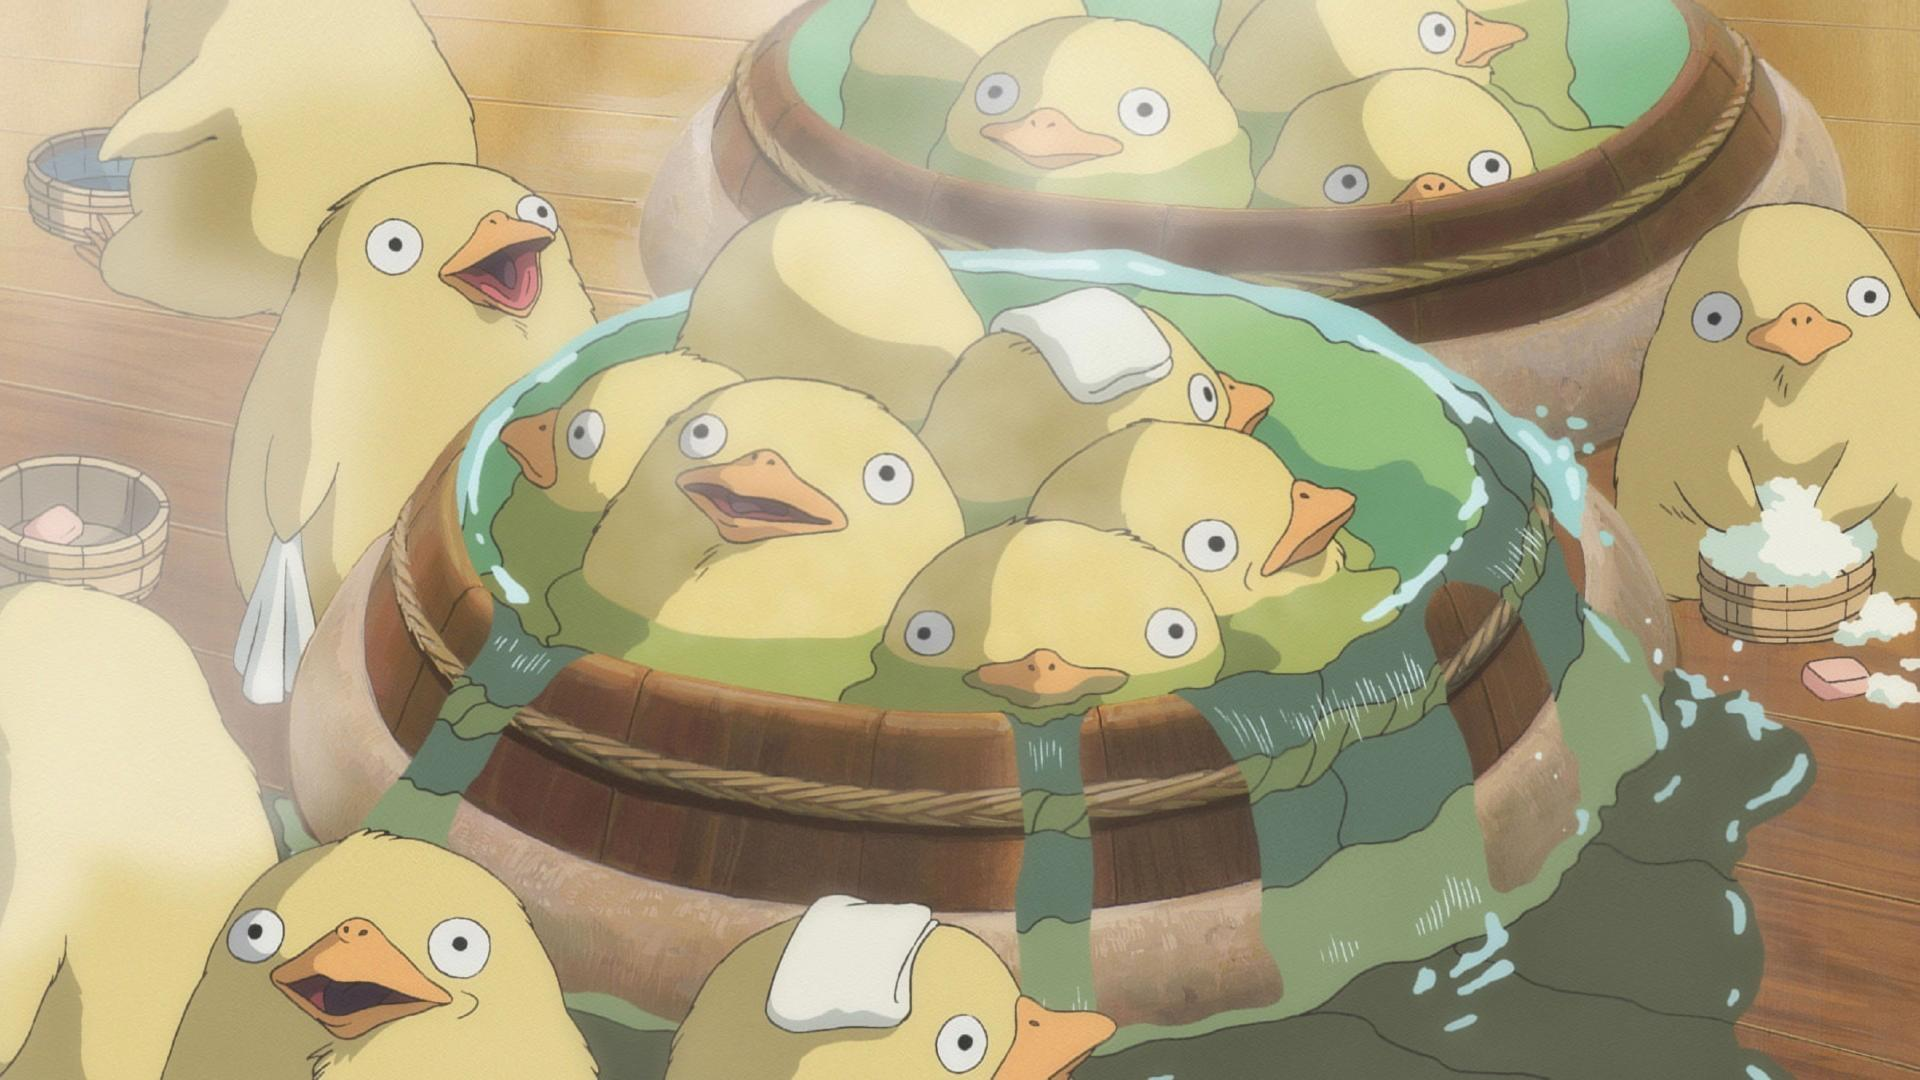